In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

import scipy.stats as stats

from scipy.stats import t, norm

In [2]:
data = pd.read_csv(r"C:\Users\lakshya_hanshvik\Desktop\Datasets/OnlineNewsPopularity.csv")
data.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
data= data.drop(['url', 'timedelta'],axis=1)

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.00000,4.478404,4.664082,4.854839,8.041534


# Target Variable

C:\Users\lakshya_hanshvik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


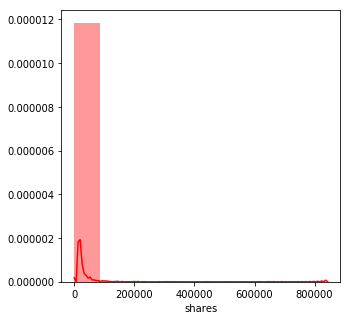

In [7]:
plt.figure(figsize=(5,5))
sns.distplot(data['shares'], color='r', bins=10)

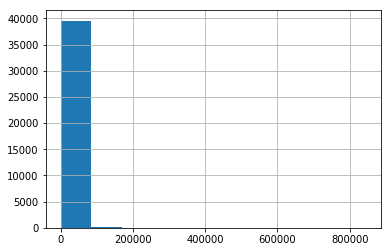

In [8]:
data['shares'].hist(bins=10)

# Target variable after log transformation

count    39644.000000
mean         7.474855
std          0.930486
min          0.000000
25%          6.852243
50%          7.244228
75%          7.937375
max         13.645078
Name: shares, dtype: float64

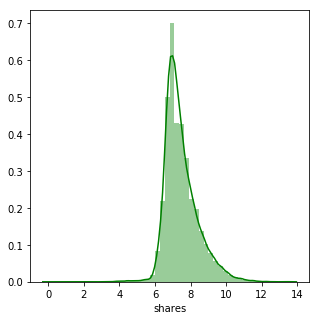

In [11]:
target = np.log(data.shares)

plt.figure(figsize=(5,5))
sns.distplot(target, color='g', bins=50)

target.describe()

# Removing Outliers  : Using Standard Deviation


In [30]:
data = data[data.average_token_length != 0]
data = data[data.rate_positive_words + data.rate_negative_words != 0]
data = data[data.n_non_stop_words <=1]  
data = data[data.n_unique_tokens <=1]
data = data[data.n_non_stop_unique_tokens<=1]
data = data[data.num_hrefs <200]
data = data[data.num_self_hrefs <100]
data = data[data.n_tokens_title <=20]



shares_stats= data['shares'].describe()
median = round(shares_stats['50%'] , 4) 
STD = round(shares_stats['std'] , 4)        


data_clean = data[data.shares >( median- 2*STD)] 
data_clean = data[data.shares < (median+ 2*STD)]
print(data_clean['shares'].describe())

target = np.log(data_clean.shares)
data_clean.head(10)

count    37895.000000
mean      2538.915134
std       3167.454572
min          1.000000
25%        939.000000
50%       1400.000000
75%       2600.000000
max      24500.000000
Name: shares, dtype: float64


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,4.855670,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,1.0,5.090909,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


# Is the  distribution of the target (shares) normal

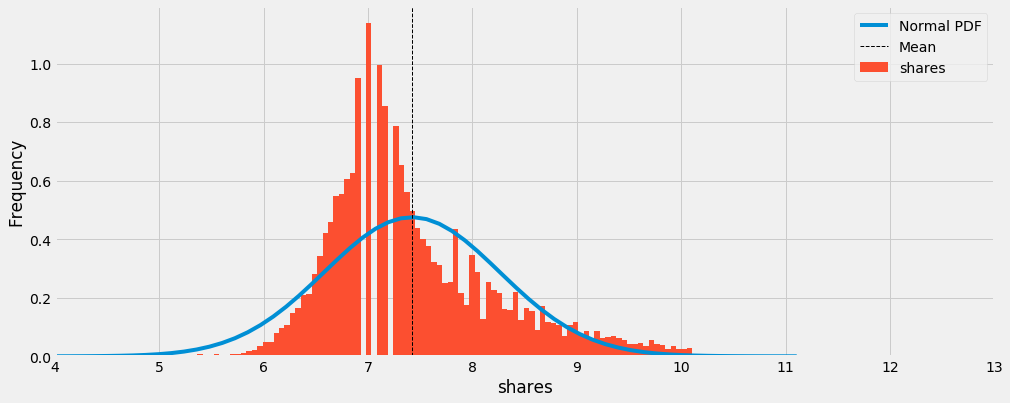

In [31]:
plt.figure(figsize=(15,6))


size = np.linspace(target.min()-1, target.max()+1,100)
pdf = stats.norm.pdf(size, target.mean(), target.std())
_= plt.plot(size, pdf)

n_bins = int(np.sqrt(len(target)))
_ = plt.hist(target, bins= n_bins,density=True)


_ = plt.axvline(target.mean(), color='k', linestyle='dashed', linewidth=1)
_ = plt.xlim(4,13)               
_ = plt.xlabel('shares')
_ = plt.ylabel('Frequency')
_ = plt.legend(['Normal PDF','Mean','shares' ])

In [32]:
#defining Empirical Cumulative Distribution Function to plot sample cumulative distribution vs. the theoretical normal

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

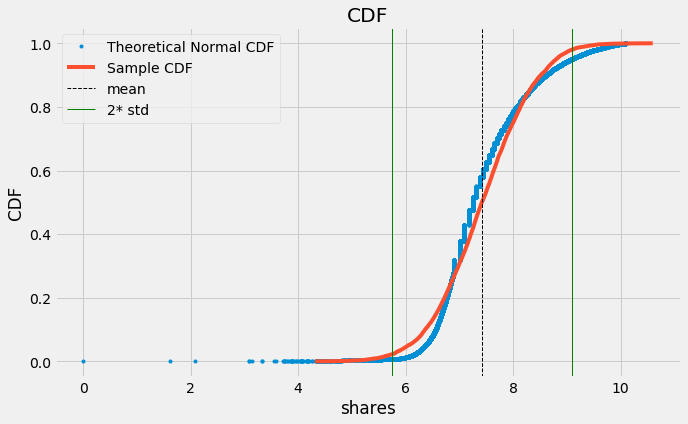

In [33]:
samples = np.random.normal(target.mean(),target.std(),10000)

x,y = ecdf(target)
x_sample,y_sample = ecdf(samples)

# Plot the CDFs 
_ = plt.figure(figsize=(10,6))
_ = plt.style.use('fivethirtyeight')

_ = plt.plot(x,y,marker='.', linestyle='none')
_ = plt.plot(x_sample,y_sample)
_ = plt.axvline(target.mean(), color='k', linestyle='dashed', linewidth=1)
_ = plt.axvline(target.mean()+ 2*target.std(), color='g', linestyle='solid', linewidth=1)
_ = plt.axvline(target.mean()- 2*target.std(), color='g', linestyle='solid', linewidth=1)

_ = plt.xlabel("shares")
_ = plt.ylabel("CDF")
_ = plt.legend(['Theoretical Normal CDF', 'Sample CDF', 'mean' , '2* std'],loc='upper left')
_ = plt.title("CDF")

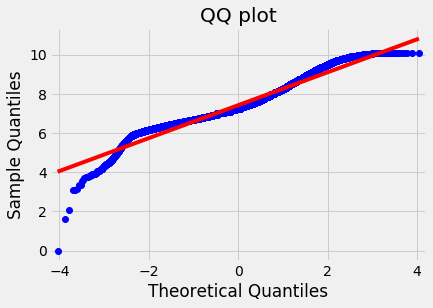

In [34]:

# QQ Plot
from numpy.random import seed
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(target, line='s')
_ = plt.title("QQ plot")


# Is there a significant difference mean number of shares on a weekday and a weekend

In [57]:
weekday = data_clean[data_clean['is_weekend'] == 0]['shares']
print(weekday.shape)
weekday.describe()

(32949,)


count    32949.000000
mean      2450.527027
std       3128.200462
min          1.000000
25%        907.000000
50%       1300.000000
75%       2500.000000
max      24500.000000
Name: shares, dtype: float64

In [58]:
weekend = data_clean[data_clean['is_weekend'] == 1]['shares']
print(weekend.shape)
weekend.describe()

(4946,)


count     4946.000000
mean      3127.734331
std       3358.953215
min         43.000000
25%       1300.000000
50%       1900.000000
75%       3500.000000
max      24500.000000
Name: shares, dtype: float64

Null Hypothesis : There is no difference in mean shares  between the  weekday and weekend

Alternate Hypothesis :Mean of shares weekday and weekend  are different

alpha = 0.05

In [61]:
def draw_bs_reps(data):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(10000)

    # Generate replicates
    for i in range(10000):
        bs_replicates[i] = np.mean(np.random.choice(data, size=len(data)))

    return bs_replicates

In [63]:

weekday = data_clean[data_clean['is_weekend'] == 0]['shares']
weekend = data_clean[data_clean['is_weekend'] == 1]['shares']

mean_shares = np.mean(data_clean['shares'])

# Generate shifted arrays
weekday_shifted = weekday - np.mean(weekday) + mean_shares
weekend_shifted = weekend - np.mean(weekend) + mean_shares


# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_weekday = draw_bs_reps(weekday_shifted)
bs_replicates_weekend = draw_bs_reps(weekend_shifted)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_weekday - bs_replicates_weekend


# Compute and print p-value: p
diff = np.mean(weekday) - np.mean(weekend)
p = np.sum(bs_replicates == diff / len(bs_replicates))
print('p-value =', p)


p-value = 0


Conclusion : With p value of 0 , we reject the null Hypothesis, i.e there is a difference between number of shares on weekday and weekend

# Rate negative words  and Rate positive words


In [71]:
data_clean['rate_negative_words'].describe()

count    37895.000000
mean         0.296500
std          0.149838
min          0.000000
25%          0.200000
50%          0.285714
75%          0.386667
max          1.000000
Name: rate_negative_words, dtype: float64

In [84]:
df=data_clean[['rate_negative_words','rate_positive_words','shares']]
r= df.corr()
print(r)
print()

                     rate_negative_words  rate_positive_words   shares
rate_negative_words              1.00000             -1.00000 -0.01592
rate_positive_words             -1.00000              1.00000  0.01592
shares                          -0.01592              0.01592  1.00000



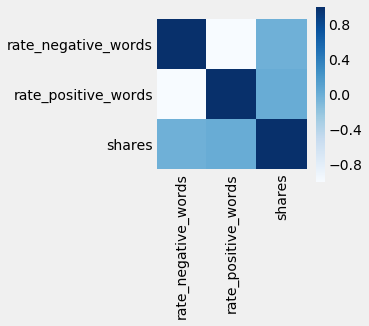

In [85]:
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(df.corr(), vmax=1, cmap= 'Blues',square=True,ax=ax);
#plt.xticks(rotation=45)

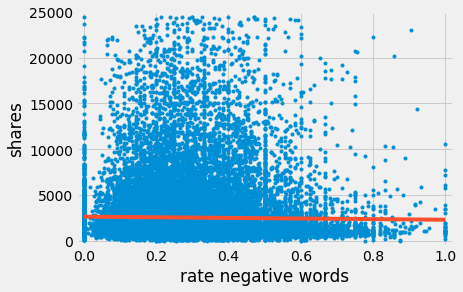

In [82]:
_ = plt.plot(df.rate_negative_words, df.shares,marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('rate negative words')
_ = plt.ylabel('shares')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df.rate_negative_words, df.shares,1)

# Make theoretical line to plot
x = np.array([0,1])
y = a*x+b

# Add regression line to your plot
_ = plt.plot(x,y)


From the above correlation values , and the  plot , it seems that there is a weak negative correlation between rate negative words and number of shares.

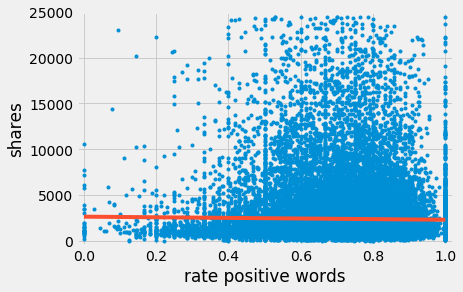

In [87]:
_ = plt.plot(df.rate_positive_words, df.shares,marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('rate positive words')
_ = plt.ylabel('shares')
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(df.rate_negative_words, df.shares,1)

# Make theoretical line to plot
x = np.array([0,1])
y = a*x+b

# Add regression line to your plot
_ = plt.plot(x,y)

From the scatter plot and the correlation matrix, we can see that a strong positive relation exists between  number of shares and posituve words.when the rate of positive is between 0.6 to 0.9 the article is getting popular with high number of shares 

Null hypothesis : There is NO difference between the distribution of rate of positive words and rate of negative words 
                    i.e the mean difference between the two  is 0:  P1 = P2                             

Alternate Hypothesis  :   P1  != P2

In [88]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [89]:
# Define two samples


empirical_diff_means = diff_of_means(df.rate_negative_words, df.rate_positive_words)

print('empirical difference in means =', empirical_diff_means)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(df.rate_negative_words, df.rate_positive_words,
                               diff_of_means, size=10000)

# # Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# # Print the result
print('p-value =', p)

empirical difference in means = -0.40699948853629087
p-value = 1.0



#  Test whether  number of images significantly affects “number of shares”

H0 : number of images does not affect  the number of shares
H1 : Number of images affect the number of shares

In [90]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [92]:
# Compute observed correlation: r_obs
r_obs = pearson_r(data_clean.num_imgs,data_clean.shares)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i  in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    images_permuted = np.random.permutation(data_clean.num_imgs)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(images_permuted,data_clean.shares)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


since p value =0 , we reject the num hypothesis, i.e the number of images do affect the number of shares.

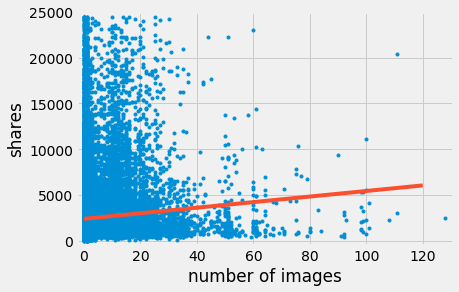

In [94]:
_ = plt.plot(data_clean.num_imgs,data_clean.shares,marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.xlabel('number of images')
_ = plt.ylabel('shares')
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(data_clean.num_imgs,data_clean.shares,1)

